In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import LabelEncoder
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
%matplotlib inline

In [185]:
df = pd.read_csv('Cleaned_Dataset.csv')
df.head()

MovieID  Rating                                   Title  \
0     1193       5  One Flew Over the Cuckoo's Nest (1975)   
1       48       5                       Pocahontas (1995)   
2      938       4                             Gigi (1958)   
3     1207       4            To Kill a Mockingbird (1962)   
4     1721       4                          Titanic (1997)   

                                 Genres  
0                                 Drama  
1  Animation|Children's|Musical|Romance  
2                               Musical  
3                                 Drama  
4                         Drama|Romance

In [186]:
df.shape

(16912, 4)

In [187]:
# Encoding Categorical Data
columns = ['Title', 'Genres']
encoder = [LabelEncoder() for i in range(2)]
for i in range(2):
    encoder[i].fit(df[columns[i]])
    df[columns[i]] = encoder[i].transform(df[columns[i]]) 
df.head()

MovieID  Rating  Title  Genres
0     1193       5   2452     239
1       48       5   2598     153
2      938       4   1331     281
3     1207       4   3381     239
4     1721       4   3374     252

In [188]:
'''genres = df['Genres']
df.drop('Genres',axis=1,inplace=True)'''

"genres = df['Genres']\ndf.drop('Genres',axis=1,inplace=True)"

The Following Benchmarks have been used for clustering:
- R^2: R^2 indicates the extent to which clusters are different from each other. It should be maximum as possible
- 5 <= Cluster Size <= 15
- Objects amount in each cluster should lie between 5% - 35%
- Root Mean Square Standard Deviation (RMSSTD) < 1.4 : RMSSTD is a measure of homogeneity within clusters
- Distance of each cluster centroid > 1.4
- Average Silhouette Coefficient Score should be close to +1

In [189]:
df.head()

MovieID  Rating  Title  Genres
0     1193       5   2452     239
1       48       5   2598     153
2      938       4   1331     281
3     1207       4   3381     239
4     1721       4   3374     252

In [190]:
# Assuming K = 5
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [191]:
df['cluster'] = kmeans.labels_
df.head()

MovieID  Rating  Title  Genres  cluster
0     1193       5   2452     239        3
1       48       5   2598     153        3
2      938       4   1331     281        4
3     1207       4   3381     239        3
4     1721       4   3374     252        3

In [192]:
r_2 = df.groupby("cluster").mean().mean(axis=1).var()/df.values.var()
r_2

0.1086992975256341

In [193]:
# Iteration through different k to obtain optimal k
distortions = []
r_2 = []
K = range(2,20)
for k in K:
    kmean = KMeans(n_clusters=k).fit(df)
    kmean.fit(df)
    df['cluster'] = kmean.labels_
    r_2.append(df.groupby("cluster").mean().mean(axis=1).var()/df.values.var())
    distortions.append(sum(np.min(cdist(df, kmean.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])
    print('Iteration ',k,' completed')

Iteration  2  completed
Iteration  3  completed
Iteration  4  completed
Iteration  5  completed
Iteration  6  completed
Iteration  7  completed
Iteration  8  completed
Iteration  9  completed
Iteration  10  completed
Iteration  11  completed
Iteration  12  completed
Iteration  13  completed
Iteration  14  completed
Iteration  15  completed
Iteration  16  completed
Iteration  17  completed
Iteration  18  completed
Iteration  19  completed


In [194]:
i= 2
for val in r_2:
    print('R-Square for Cluster size:',i,':',np.round(val, decimals=4)*100)
    i=i+1

R-Square for Cluster size: 2 : 9.35
R-Square for Cluster size: 3 : 10.51
R-Square for Cluster size: 4 : 11.16
R-Square for Cluster size: 5 : 10.870000000000001
R-Square for Cluster size: 6 : 11.3
R-Square for Cluster size: 7 : 11.66
R-Square for Cluster size: 8 : 11.940000000000001
R-Square for Cluster size: 9 : 11.65
R-Square for Cluster size: 10 : 12.26
R-Square for Cluster size: 11 : 12.19
R-Square for Cluster size: 12 : 11.83
R-Square for Cluster size: 13 : 11.53
R-Square for Cluster size: 14 : 11.540000000000001
R-Square for Cluster size: 15 : 11.84
R-Square for Cluster size: 16 : 11.91
R-Square for Cluster size: 17 : 11.87
R-Square for Cluster size: 18 : 11.65
R-Square for Cluster size: 19 : 11.52


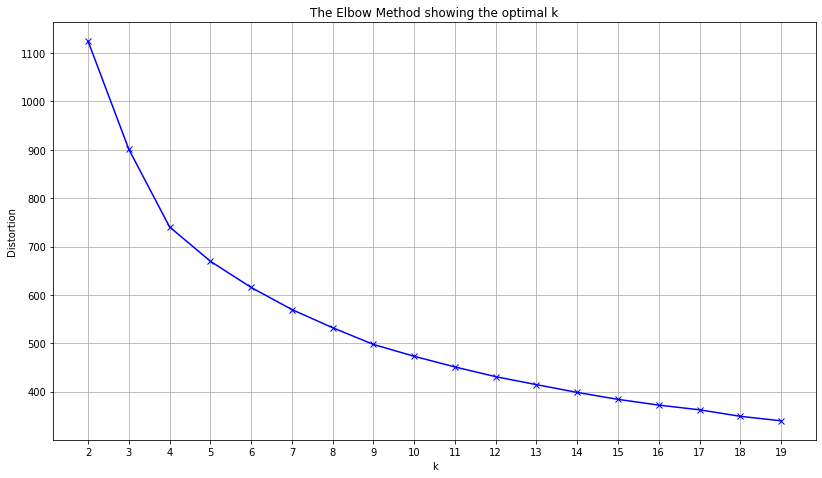

In [195]:
# Plotting elbow
fig = plt.figure(figsize=[13.66,7.68])
plt.plot(K, distortions, 'bx-')
plt.grid()
plt.xticks(ticks=K)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

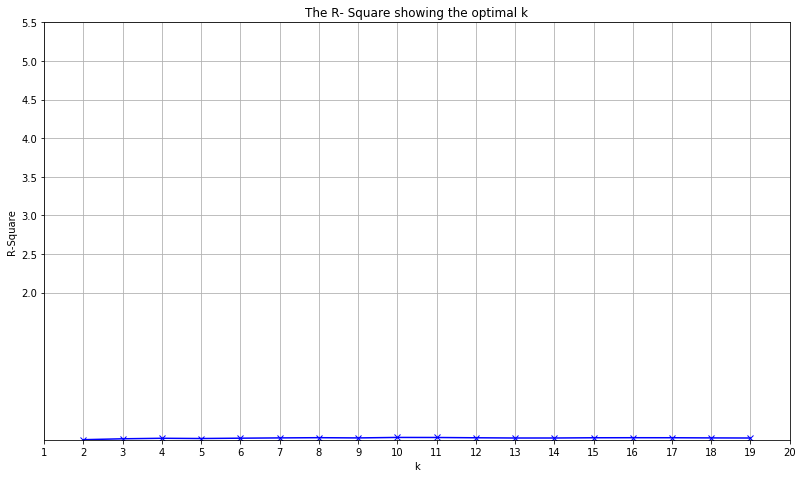

In [196]:
plt.figure(figsize=[13.36,7.68])
plt.plot(K, r_2, 'bx-')
plt.xticks([i for i in range(1,21)])
plt.yticks([i/10 for i in range(20,60,5)])
plt.grid(True)
plt.xlabel('k')
plt.ylabel('R-Square')
plt.title('The R- Square showing the optimal k')
plt.show()

[]

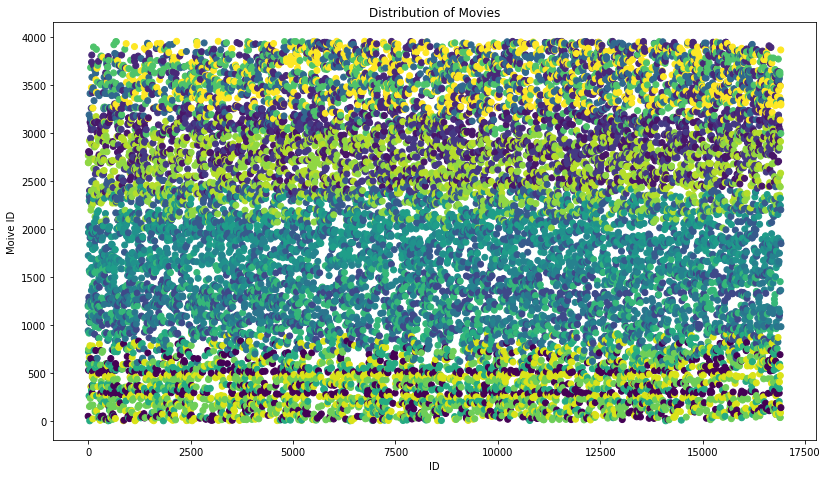

In [197]:
fig = plt.figure(figsize=[13.66,7.68])
plt.scatter(df.index, df['MovieID'], c=df['cluster'], marker='o')
plt.title('Distribution of Movies')
plt.xlabel('ID')
plt.ylabel('Moive ID')
plt.plot()

For n_clusters = 5 The average silhouette_score is : 0.39245762791095995
For n_clusters = 6 The average silhouette_score is : 0.36411661104645704
For n_clusters = 7 The average silhouette_score is : 0.3725321425217405
For n_clusters = 8 The average silhouette_score is : 0.357440406194089
For n_clusters = 9 The average silhouette_score is : 0.35978400605493577
For n_clusters = 10 The average silhouette_score is : 0.3553401124354456
For n_clusters = 11 The average silhouette_score is : 0.3508670713345638
For n_clusters = 12 The average silhouette_score is : 0.3522909455719812
For n_clusters = 13 The average silhouette_score is : 0.3557466682888372
For n_clusters = 14 The average silhouette_score is : 0.34862798908823267
For n_clusters = 15 The average silhouette_score is : 0.35585846513026215


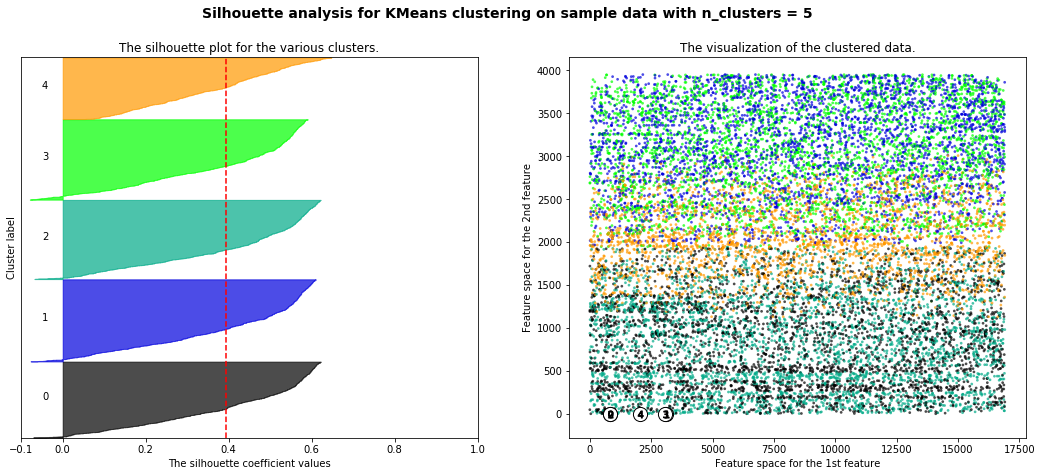

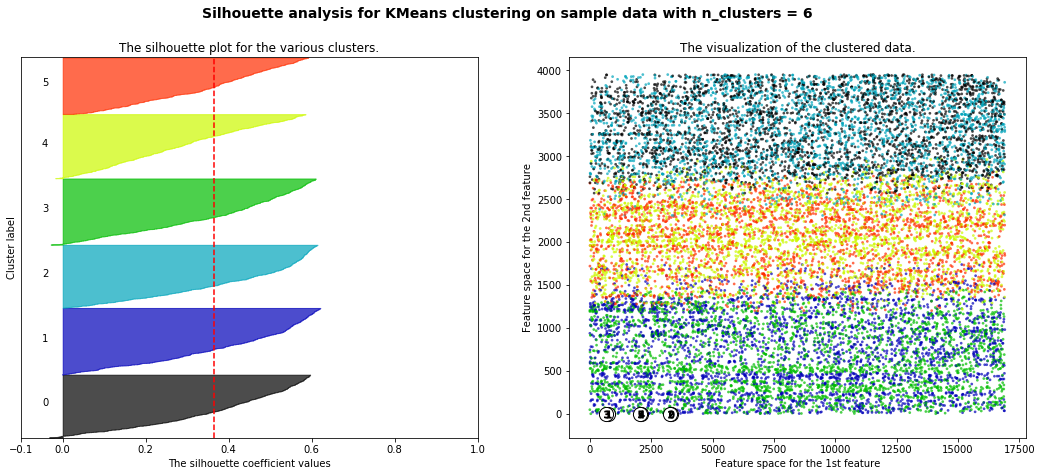

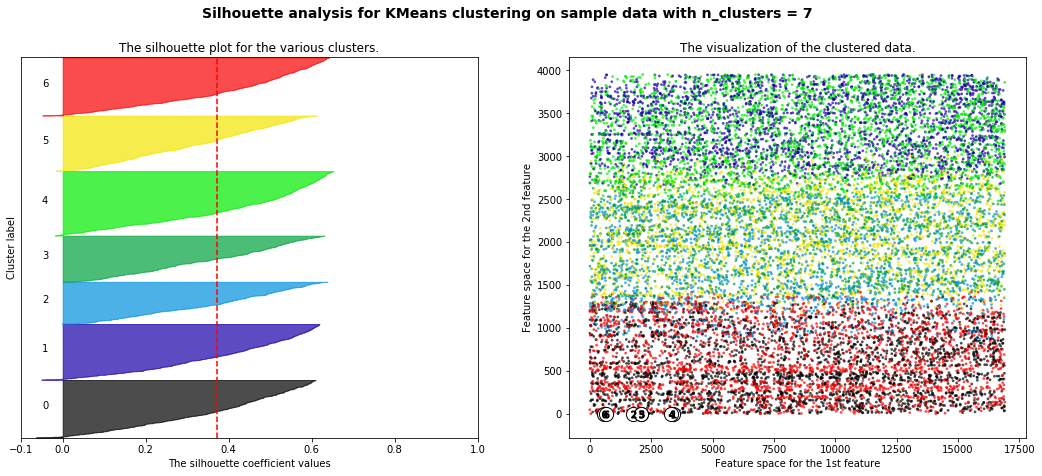

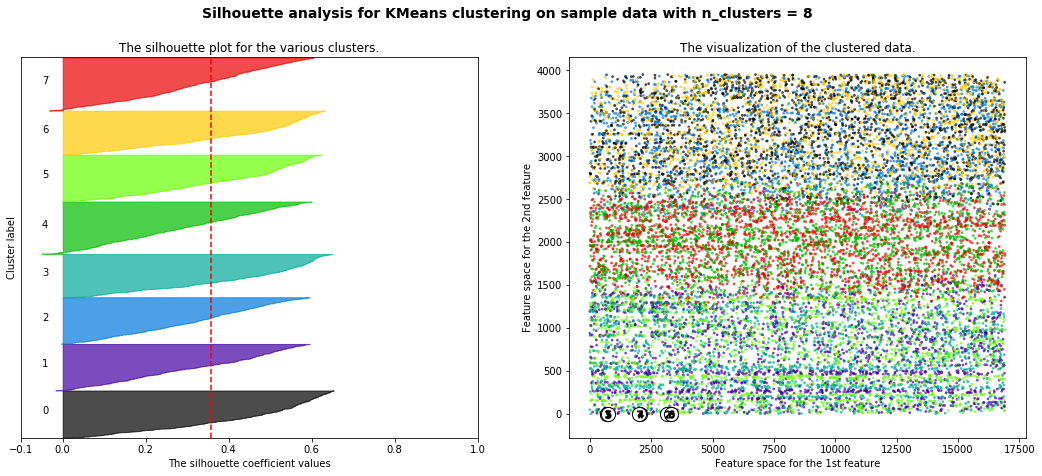

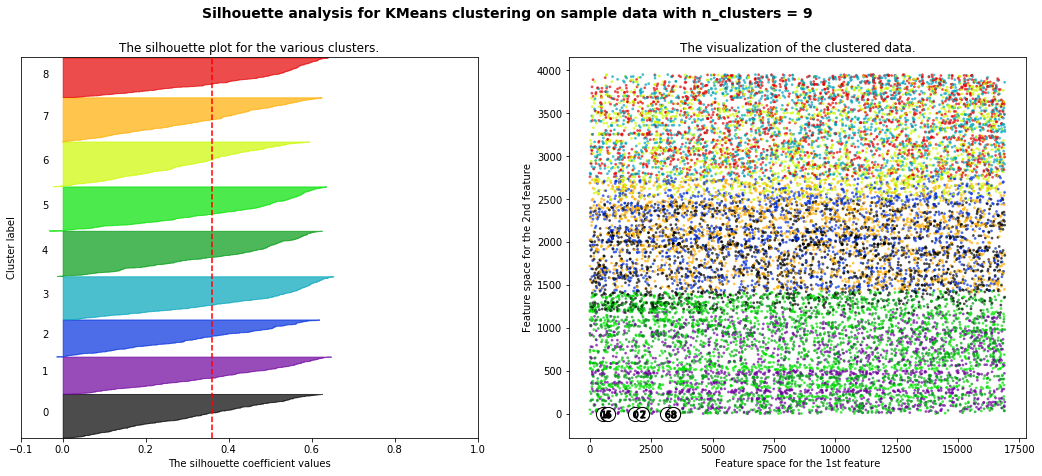

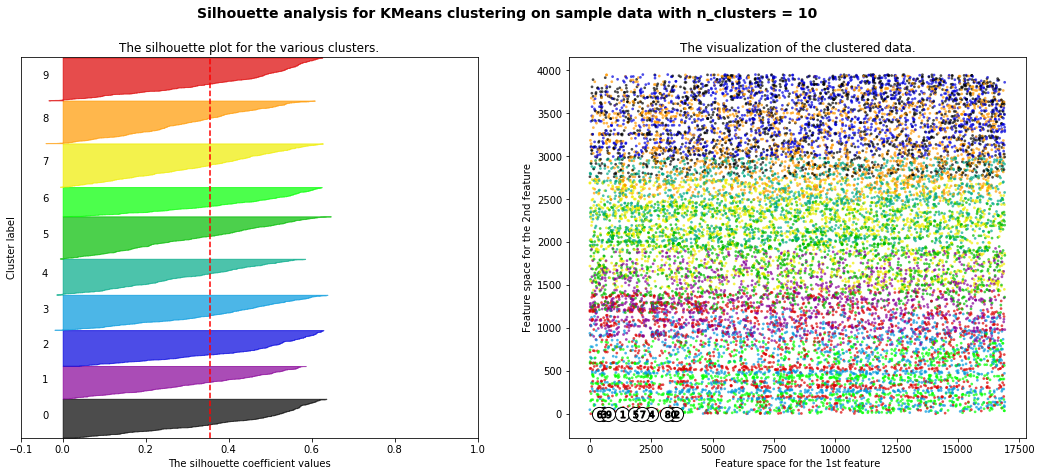

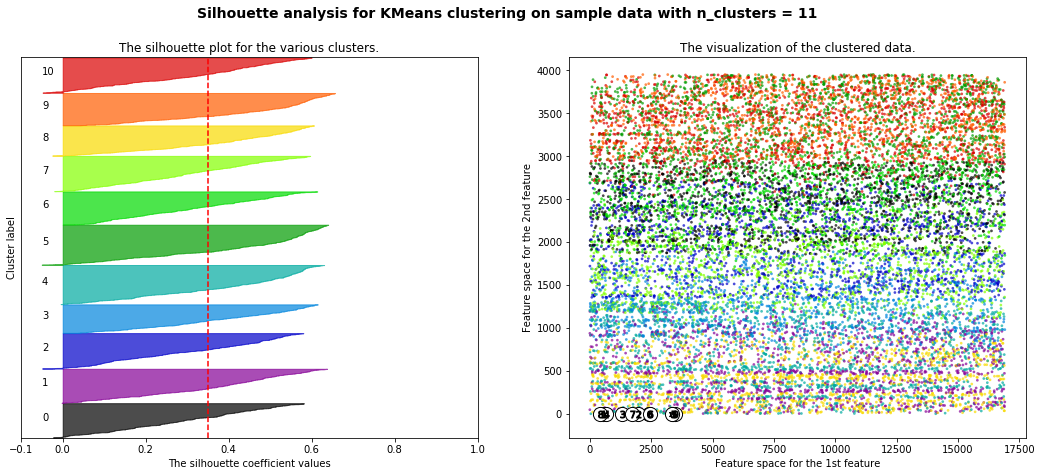

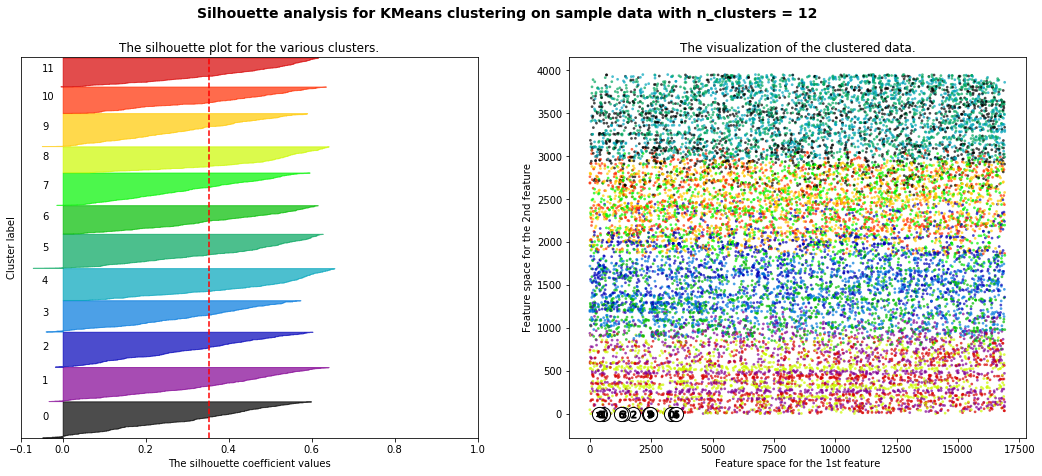

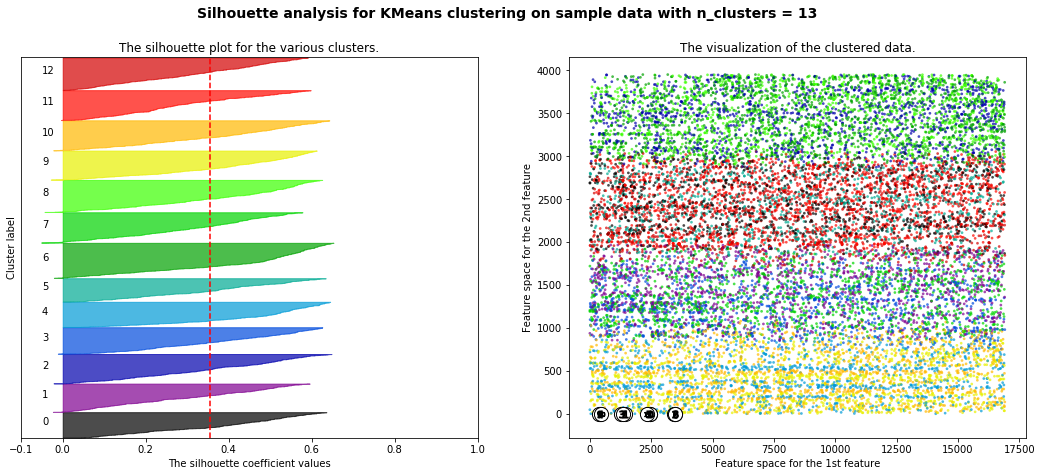

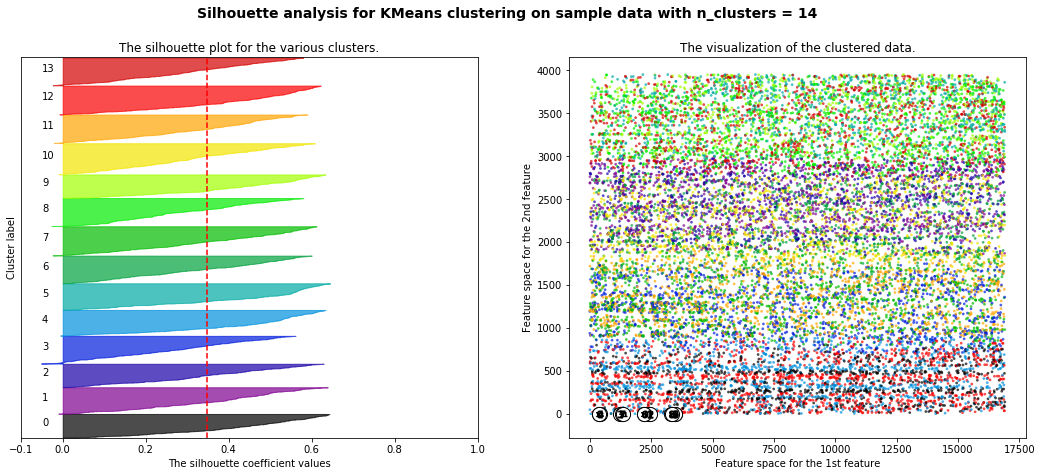

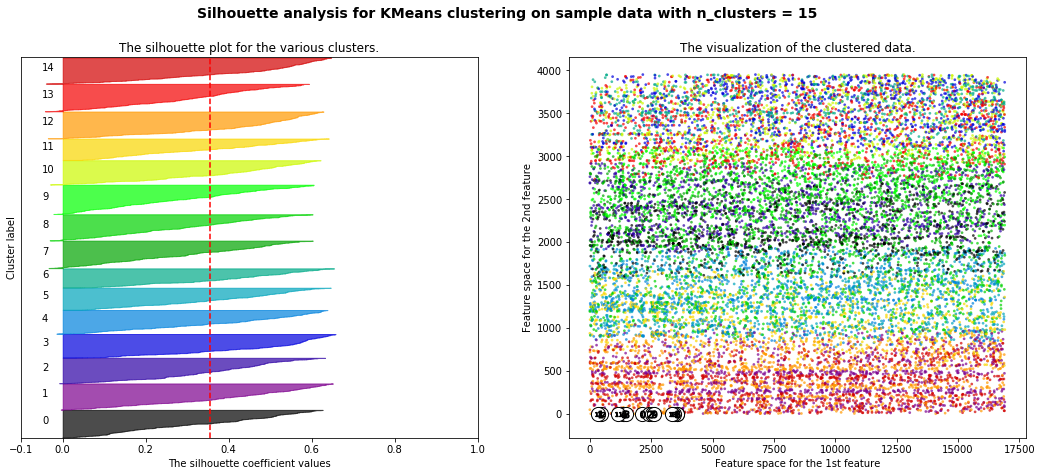

In [198]:
range_n_clusters = [5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, df.shape[0] + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df.index, df['MovieID'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

plt.show()

In [199]:
kmeans = KMeans(n_clusters=7).fit(df)
kmeans.fit(df)
df['cluster'] = kmeans.labels_

<h3>Estimating Centroid for each cluster

In [200]:
centroid = df.groupby("cluster").mean().mean(axis=1)
centroid

cluster
0    1087.686761
1     924.192166
2    1587.059815
3     453.044032
4    1031.702371
5    1348.765488
6     614.914175
dtype: float64

<h3>Samples per Cluster

In [201]:
df['cluster'].value_counts()

0    2874
1    2585
3    2572
2    2491
4    2467
5    2050
6    1873
Name: cluster, dtype: int64

<h3>Root Mean Square Standard Deviation (RMSSTD)

In [202]:
df.groupby("cluster").var().mean(axis=1).apply(np.sqrt)

cluster
0    315.301696
1    314.999105
2    312.231773
3    320.639532
4    285.451289
5    279.029199
6    288.093264
dtype: float64

In [203]:
df.head()

MovieID  Rating  Title  Genres  cluster
0     1193       5   2452     239        1
1       48       5   2598     153        1
2      938       4   1331     281        3
3     1207       4   3381     239        1
4     1721       4   3374     252        5

[]

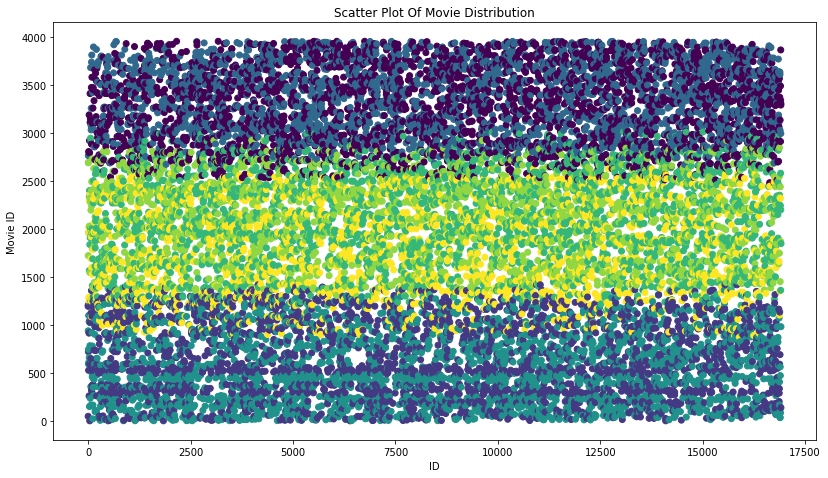

In [204]:
plt.figure(figsize=[13.66,7.68])
plt.scatter(df.index, df['MovieID'], c=df['cluster'], marker='o')
plt.title('Scatter Plot Of Movie Distribution')
plt.xlabel('ID')
plt.ylabel('Movie ID')
plt.plot()

In [206]:
for i in range(2):
    df[columns[i]] = encoder[i].inverse_transform(df[columns[i]])
df.head()

MovieID  Rating                                   Title  \
0     1193       5  One Flew Over the Cuckoo's Nest (1975)   
1       48       5                       Pocahontas (1995)   
2      938       4                             Gigi (1958)   
3     1207       4            To Kill a Mockingbird (1962)   
4     1721       4                          Titanic (1997)   

                                 Genres  cluster  
0                                 Drama        1  
1  Animation|Children's|Musical|Romance        1  
2                               Musical        3  
3                                 Drama        1  
4                         Drama|Romance        5

In [207]:
# Input excluded Genre
inp = np.array([[1, 48, 5, 2598, 153]])
val = kmeans.predict(inp)[0]
newframe = df[(df['cluster']==val & (df['Rating']>=4))]

In [208]:
Movies = newframe['Title'].unique()
Movies

array(["One Flew Over the Cuckoo's Nest (1975)", 'Pocahontas (1995)',
       'To Kill a Mockingbird (1962)', ...,
       'Man from Down Under, The (1943)', 'Chain of Fools (2000)',
       'Broken Vessels (1998)'], dtype=object)

In [209]:
Movies.shape

(1152,)

In [210]:
df.shape

(16912, 5)